# Лабораторная работа 7 Югай Илья AIN-1-21

1)	Изучите материал лекции 12, проделайте пример, описанный в ходе работы.

In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [2]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [3]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)

In [6]:
X = vect.fit_transform(text_train)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics = lda.fit_transform(X)

In [8]:
lda.components_.shape

(10, 10000)

In [9]:
import numpy as np
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

In [11]:
feature_names = np.array(vect.get_feature_names_out())

In [12]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          saw           
real          world         guy           series        didn          
performance   book          comedy        episode       am            
young         us            thing         tv            thought       
family        our           actually      episodes      dvd           
both          documentary   worst         shows         years         
director      work          re            season        got           
role          american      nothing       new           again         
actors        history       actors        years         now           
beautiful     point         want          family        watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [13]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [14]:
import numpy as np
topics = np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
horror        didn          hitler        car           beautiful     performance   japanese      
de            worst         german        gets          romantic      role          excellent     
thriller      thing         years         police        young         play          highly        
suspense      boring        nazi          guy           between       actor         performances  
atmosphere    script        young         killed        old           actors        human         
mystery       horrible      midnight      kill          feel          cast          culture       
house         re            joe           around        saw           oscar         actors        
director      wasn          modesty       down          wonderful     performances  truly         
quite     

In [15]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")
    

b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"After repeated listenings to the CD soundtrack, I knew I wanted this film, got it for Christmas and I was amazed. Marc Bolan had such charisma, i can't describe it.\n"
b'I love this movie and never get tired of watching. The music in it is great.\n'
b'I love this movie!!! Purple Rain came out the year I was born and it has had my heart since I can remember. Prince is so tight in this movie.\n'
b"The funky, yet strictly second-tier British glam-rock band 

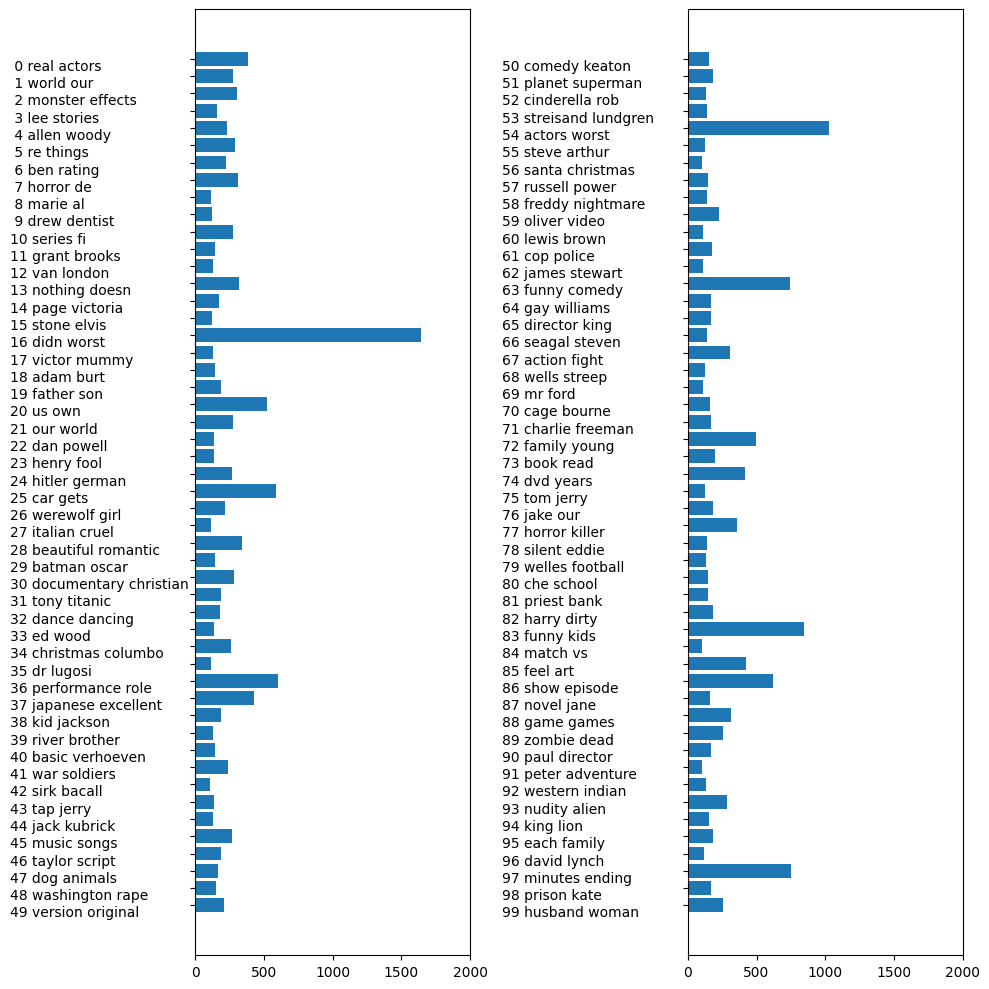

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ". join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0) [start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col]. set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [11]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\for_i\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Пример набора данных: Замените это своими отзывами
reviews = [
    "Отличный продукт, рекомендую всем!",
    "Не соответствует описанию, разочарован.",
    "Замечательное обслуживание и качество товара.",
    "Слишком дорого для такого качества.",
    "Доставка заняла слишком много времени.",
    "Превзошло все мои ожидания!",
    "Качество хорошее, но цена слишком высока.",
    "Ужасный опыт, не буду заказывать здесь снова.",
    "Очень удобно и практично в использовании.",
    "Продукт не работает должным образом.",
    "Отличный сервис и быстрая доставка.",
    "Качество не соответствует цене.",
    "Великолепно, я очень доволен покупкой!",
    "Размер не подошел, хотя описание было точным.",
    "Продукт прибыл поврежденным, требуется возврат.",
    "Очень эффективно, результаты видны сразу.",
    "Не рекомендую, качество оставляет желать лучшего.",
    "Удивительное качество за такую цену!",
    "Плохая упаковка, товар пришел в плохом состоянии.",
    "Легко использовать, результаты отличные.",
    "Не соответствует заявленным характеристикам.",
    "Покупка оказалась успешной, рекомендую.",
    "Слишком много недостатков, не стоит своих денег.",
    "Покупкой полностью доволен, буду покупать еще.",
    "Сервис хорош, но продукт не оправдал ожиданий.",
    "Прекрасный вкус, буду покупать снова.",
"Не то, что я ожидал, качество ниже среднего.",
"Быстрая доставка, удобная упаковка.",
"Цвет не соответствует изображению на сайте.",
"Продавец очень вежлив и помогает с выбором.",
"Неприятный запах, не рекомендую.",
"Отлично подходит для ежедневного использования.",
"Инструкция слишком сложная, неудобно пользоваться.",
"Быстро изнашивается, не стоит своих денег.",
"Идеально подошло, как будто сделано на заказ.",
"Слишком громкий, невозможно использовать ночью.",
"Превосходное соотношение цены и качества.",
"Сервис оставляет желать лучшего, неудовлетворительный опыт.",
"Полностью натуральные ингредиенты, это заметно.",
"Зарядка длится очень мало, постоянно нужно подзаряжать.",
"Яркий и чистый цвет, как на картинке.",
"Размер не соответствует заявленному.",
"Доставили не то, что заказывал.",
"Легко чистится и удобно хранить.",
"Неэффективно, не заметил никакого эффекта.",
"Удобное приложение для управления, интуитивно понятно.",
"Ткань быстро выцветает, не рекомендую стирать часто.",
"Прекрасно подходит для моего стиля жизни.",
"Звуковое качество оставляет желать лучшего.",
"Отличная игрушка, мои дети в восторге."
]


In [13]:
# Разделение данных на обучающую и тестовую выборки
text_train, text_test = train_test_split(reviews, test_size=0.2, random_state=42)


In [14]:
# Создание мешка слов с использованием TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords)
X_train_tfidf = tfidf_vectorizer.fit_transform(text_train)

In [15]:
# Исследование коэффициентов модели
lda = LatentDirichletAllocation(n_components=5) # Адаптируйте n_components по необходимости
lda.fit(X_train_tfidf)

LatentDirichletAllocation(n_components=5)

In [18]:
# Печать топ-слов для каждой темы
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Тема #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names_tfidf)

tfidf_df.head()

Тема #0:
соответствует оставляет лучшего желать очень заявленному размер описанию разочарован великолепно
Тема #1:
сайте изображению недостатков заказ сделано идеально подошло цвет заказывать снова
Тема #2:
качество быстро рекомендую цене товара обслуживание замечательное покупка оказалась успешной
Тема #3:
доставка слишком отличный быстрая сервис продукт заказывал доставили превзошло ожидания
Тема #4:
заявленным характеристикам дорого такого качества покупать видны сразу результаты эффективно


,буду,быстрая,быстро,вежлив,великолепно,видны,вкус,возврат,восторге,времени,...,цене,цену,цены,часто,чистится,чистый,это,эффекта,эффективно,яркий
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ВЫВОД

Анализируя результаты выполнения программы по темам и коэффициентам, можно сделать следующие выводы:

Тема #0 "Несоответствие ожиданиям": Эта тема включает слова, связанные с разочарованием и несоответствием ожиданиям (например, "соответствует", "ожидания", "разочарован"). Это указывает на то, что в наборе данных присутствуют отзывы, выражающие недовольство клиентов.

Тема #1 "Позитивное восприятие": Содержит слова, связанные с удовлетворением и положительными отзывами о продукте или услуге (например, "снова заказывать", "идеально подошло"). Это говорит о наличии положительных отзывов в анализируемом наборе данных.

Тема #2 "Качество и обслуживание": Объединяет слова, связанные с качеством товара и уровнем обслуживания (например, "качество", "обслуживание", "рекомендую"). Это может указывать на то, что для клиентов важны качество продукта и сервис.

Тема #3 "Доставка и сервис": Сосредотачивается на аспектах доставки и общего сервиса (например, "доставка", "сервис", "отличный"). Это подчеркивает важность быстрой и качественной доставки для клиентов.

Тема #4 "Цена и эффективность": Содержит слова, касающиеся стоимости и эффективности продукта (например, "дорого", "эффективно", "результаты"). Это говорит о том, что ценовой фактор и соотношение цены и качества имеют значение для клиентов.

Общий вывод: Анализ отзывов выявил разнообразные аспекты, важные для клиентов, включая качество продукта, уровень обслуживания, процесс доставки и ценовую политику. Набор данных содержит как положительные, так и отрицательные отзывы, что предоставляет комплексное представление о восприятии продукта или услуги среди клиентов. Эти выводы могут быть использованы компанией для улучшения качества своих товаров и услуг, а также для оптимизации стратегии обслуживания клиентов.